In [39]:
from calc_cover_time import *
import numpy as np

In [40]:
drone_pos = {
    0: np.array([17800,0,1800]),
    1: np.array([12000,1400,1400]),
    2: np.array([6000,-3000,700]),
    3: np.array([11000,2000,1800]),
    4: np.array([13000,-2000,1300])
}

f1_position = drone_pos[0]
f2_position = drone_pos[1]
f3_position = drone_pos[2]

## 先分别计算三架无人机

In [41]:
from scipy.optimize import dual_annealing
import matplotlib.pyplot as plt

# 优化目标函数
# x: [speed, angle, throw_time, burst_delay]
cover_time_hist = []
missile_traj = get_missile_traj(M1, fake_target, v_M1, t_list)
def sa_objective(x):
    global missile_traj
    position = f1_position  # 无人机初始点
    speed = x[0]
    direction_angle = x[1]
    throw_time = x[2]
    burst_delay = x[3]
    smoke_center = get_smoke_center(position, direction_angle, speed, throw_time, burst_delay, t_list)
    cover_time = get_missile_cover_time(smoke_center, missile_traj, true_target, smoke_R, t_list)
    cover_time_hist.append(cover_time)
    # 退火算法是最小化，这里返回负值
    return -cover_time

# 参数边界：[速度, 角度, 投弹时间, 爆炸间隔]
bounds = [(70, 140), (0, np.pi *2), (0, 60), (0.1, 20)]
from tqdm.notebook import tqdm
max_iter = 3000
pbar = tqdm(total=max_iter, desc="退火优化进度")

# 定义回调函数，每次迭代后更新进度条
def progress_callback(x, f, context):
    pbar.update(1)  # 每次迭代更新进度条
result = dual_annealing(
    func=sa_objective,
    bounds=bounds,
    maxiter=max_iter,
    seed=123,
    initial_temp=1000,
    callback=progress_callback

)

print('最优参数:', result.x)
print('最大遮挡总时间:', -result.fun)

plt.figure(figsize=(8,4))
plt.plot([cover_time_01 for cover_time_01 in cover_time_hist if cover_time_01 >0], linewidth=0.1, label='遮挡总时间')
plt.xlabel('迭代步数')
plt.ylabel('遮挡总时间')
plt.title('退火优化过程中遮挡总时间变化曲线')
plt.show()

退火优化进度:   0%|          | 0/3000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
smoke_center = get_smoke_center(f1_position, result.x[1], result.x[0], result.x[2], result.x[3], t_list)
get_missile_cover_time(smoke_center, missile_traj, true_target, smoke_R, t_list, debug=True)



遮挡区间: 0.83s ~ 5.65s
总遮挡时间: 4.82s


4.824

In [ ]:
from scipy.optimize import minimize

# 局部精细优化目标函数
def local_objective(x):
    try:
        speed = x[0]
        direction_angle = x[1]
        t0 = np.clip(x[2], 0, 60)
        t1 = np.clip(max(x[3], t0+1), 0, 60)
        t2 = np.clip(max(x[4], t1+1), 0, 60)
        throw_times = np.array([t0, t1, t2])
        burst_delays = x[5:8]
        smoke_centers = get_smoke_center_multi(f1, direction_angle, speed, throw_times, burst_delays, t_list)
        cover_time = get_missile_cover_time_corners(smoke_centers, missile_traj, true_target_corners, smoke_R, t_list)
        return -cover_time
    except Exception:
        return 1e6

# 局部优化边界（以result.x为中心，±10%范围）
bounds_local = [
    (max(70, result.x[0]*0.9), min(140, result.x[0]*1.1)),
    (max(0, result.x[1]-0.1), min(np.pi*2, result.x[1]+0.1)),
    (max(0, result.x[2]-3), min(60, result.x[2]+3)),
    (max(0, result.x[3]-0.5), min(20, result.x[3]+0.5)),
]

# 使用L-BFGS-B进行局部优化
result_local = minimize(local_objective, result.x, bounds=bounds_local, method='L-BFGS-B')

print("局部优化后参数:", result_local.x)
print("最大遮挡总时间:", -result_local.fun)

smoke_center = get_smoke_center(f1_position, result_local.x[1], result_local.x[0], result_local.x[2], result_local.x[3], t_list)
get_missile_cover_time_corners(smoke_center, missile_traj, true_target_corners, smoke_R, t_list, debug=True)

局部优化后参数: [1.37695974e+02 1.05123861e-01 3.30906654e-01 4.79326938e-01]
最大遮挡总时间: -1000000.0
遮挡区间: 1.02s ~ 5.60s
总遮挡时间: 4.58s


4.5840000000000005

In [42]:
bounds_local

[(119.2411592755379, 140),
 (5.4322781256047925, 5.632278125604792),
 (9.270273219709566, 15.270273219709566),
 (2.521790035386165, 3.521790035386165)]

## f2

退火优化进度:   0%|          | 0/3000 [00:00<?, ?it/s]

最优参数: [132.49017697   5.53227813  12.27027322   3.02179004]
最大遮挡总时间: 4.272


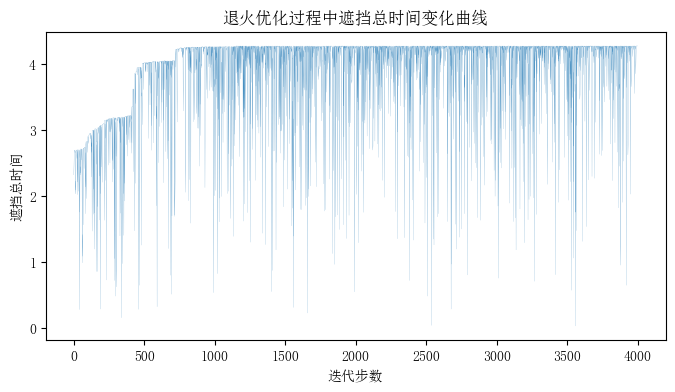

遮挡区间: 15.30s ~ 19.57s
总遮挡时间: 4.27s


4.272

In [ ]:
from scipy.optimize import dual_annealing
import matplotlib.pyplot as plt

# 优化目标函数
# x: [speed, angle, throw_time, burst_delay]
cover_time_hist = []
missile_traj = get_missile_traj(M1, fake_target, v_M1, t_list)
def sa_objective(x):
    global missile_traj
    position = f2_position  # 无人机初始点
    speed = x[0]
    direction_angle = x[1]
    throw_time = x[2]
    burst_delay = x[3]
    smoke_center = get_smoke_center(position, direction_angle, speed, throw_time, burst_delay, t_list)
    cover_time = get_missile_cover_time(smoke_center, missile_traj, true_target, smoke_R, t_list)
    cover_time_hist.append(cover_time)
    # 退火算法是最小化，这里返回负值
    return -cover_time

# 参数边界：[速度, 角度, 投弹时间, 爆炸间隔]
bounds = [(70, 140), (0, np.pi *2), (0, 60), (0.1, 5)]
from tqdm.notebook import tqdm
max_iter = 3000
pbar = tqdm(total=max_iter, desc="退火优化进度")

# 定义回调函数，每次迭代后更新进度条
def progress_callback(x, f, context):
    pbar.update(1)  # 每次迭代更新进度条
result = dual_annealing(
    func=sa_objective,
    bounds=bounds,
    maxiter=max_iter,
    seed=123,
    initial_temp=1000,
    callback=progress_callback

)

print('最优参数:', result.x)
print('最大遮挡总时间:', -result.fun)

plt.figure(figsize=(8,4))
plt.plot([cover_time_01 for cover_time_01 in cover_time_hist if cover_time_01 >0], linewidth=0.1, label='遮挡总时间')
plt.xlabel('迭代步数')
plt.ylabel('遮挡总时间')
plt.title('退火优化过程中遮挡总时间变化曲线')
plt.show()

smoke_center_val = get_smoke_center(f2_position, result.x[1], result.x[0], result.x[2], result.x[3], t_list)
get_missile_cover_time(smoke_center_val, missile_traj, true_target, smoke_R, t_list, debug=True)

In [ ]:
from scipy.optimize import minimize

# 局部精细优化目标函数
def local_objective(x):
    try:
        speed = x[0]
        direction_angle = x[1]
        t0 = np.clip(x[2], 0, 60)
        t1 = np.clip(max(x[3], t0+1), 0, 60)
        t2 = np.clip(max(x[4], t1+1), 0, 60)
        throw_times = np.array([t0, t1, t2])
        burst_delays = x[5:8]
        smoke_centers = get_smoke_center_multi(f2_position, direction_angle, speed, throw_times, burst_delays, t_list)
        cover_time = get_missile_cover_time_corners(smoke_centers, missile_traj, true_target_corners, smoke_R, t_list)
        return -cover_time
    except Exception:
        return 1e6

# 局部优化边界（以result.x为中心，±10%范围）
bounds_local = [
    (max(70, result.x[0]*0.9), min(140, result.x[0]*1.1)),
    (max(0, result.x[1]-0.1), min(np.pi*2, result.x[1]+0.1)),
    (max(0, result.x[2]-3), min(60, result.x[2]+3)),
    (max(0, result.x[3]-0.5), min(20, result.x[3]+0.5)),
]

# 使用L-BFGS-B进行局部优化
result_local = minimize(local_objective, result.x, bounds=bounds_local, method='L-BFGS-B')

print("局部优化后参数:", result_local.x)
print("最大遮挡总时间:", -result_local.fun)

smoke_center = get_smoke_center(f2_position, result_local.x[1], result_local.x[0], result_local.x[2], result_local.x[3], t_list)
get_missile_cover_time_corners(smoke_center, missile_traj, true_target_corners, smoke_R, t_list, debug=True)

局部优化后参数: [132.49017697   5.53227813  12.27027322   3.02179004]
最大遮挡总时间: -1000000.0
总遮挡时间: 0.00s


0.0

## f3

退火优化进度:   0%|          | 0/3000 [00:00<?, ?it/s]

最优参数: [118.41918887   1.37592376  24.07700523   2.46389369]
最大遮挡总时间: 4.74


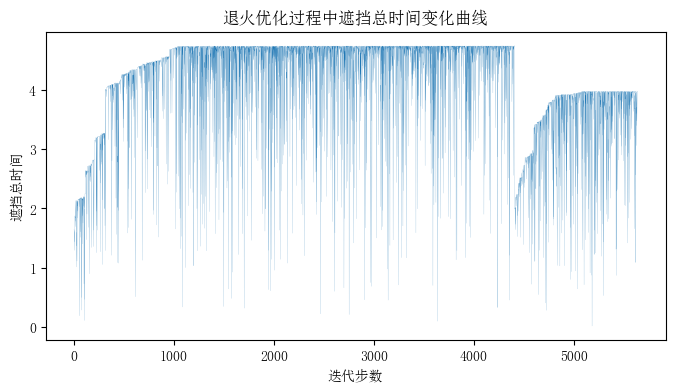

遮挡区间: 27.48s ~ 30.53s
总遮挡时间: 3.05s


3.052

In [ ]:
from scipy.optimize import dual_annealing
import matplotlib.pyplot as plt

# 优化目标函数
# x: [speed, angle, throw_time, burst_delay]
cover_time_hist = []
missile_traj = get_missile_traj(M1, fake_target, v_M1, t_list)
def sa_objective(x):
    global missile_traj
    position = f3_position  # 无人机初始点
    speed = x[0]
    direction_angle = x[1]
    throw_time = x[2]
    burst_delay = x[3]
    smoke_center = get_smoke_center(position, direction_angle, speed, throw_time, burst_delay, t_list)
    cover_time = get_missile_cover_time(smoke_center, missile_traj, true_target, smoke_R, t_list)
    cover_time_hist.append(cover_time)
    # 退火算法是最小化，这里返回负值
    return -cover_time

# 参数边界：[速度, 角度, 投弹时间, 爆炸间隔]
bounds = [(70, 140), (0, np.pi *2), (0, 60), (0.1, 5)]
from tqdm.notebook import tqdm
max_iter = 3000
pbar = tqdm(total=max_iter, desc="退火优化进度")

# 定义回调函数，每次迭代后更新进度条
def progress_callback(x, f, context):
    pbar.update(1)  # 每次迭代更新进度条
result = dual_annealing(
    func=sa_objective,
    bounds=bounds,
    maxiter=3000,
    seed=123,
    initial_temp=1000,
    callback=progress_callback

)

print('最优参数:', result.x)
print('最大遮挡总时间:', -result.fun)

plt.figure(figsize=(8,4))
plt.plot([cover_time_01 for cover_time_01 in cover_time_hist if cover_time_01 >0], linewidth=0.1, label='遮挡总时间')
plt.xlabel('迭代步数')
plt.ylabel('遮挡总时间')
plt.title('退火优化过程中遮挡总时间变化曲线')
plt.show()


In [ ]:
from scipy.optimize import minimize

# 局部精细优化目标函数
def local_objective(x):
    try:
        speed = x[0]
        direction_angle = x[1]
        t0 = np.clip(x[2], 0, 60)
        t1 = np.clip(max(x[3], t0+1), 0, 60)
        t2 = np.clip(max(x[4], t1+1), 0, 60)
        throw_times = np.array([t0, t1, t2])
        burst_delays = x[5:8]
        smoke_centers = get_smoke_center_multi(f3_position, direction_angle, speed, throw_times, burst_delays, t_list)
        cover_time = get_missile_cover_time_corners(smoke_centers, missile_traj, true_target_corners, smoke_R, t_list)
        return -cover_time
    except Exception:
        return 1e6

# 局部优化边界（以result.x为中心，±10%范围）
bounds_local = [
    (max(70, result.x[0]*0.9), min(140, result.x[0]*1.1)),
    (max(np.pi/2, result.x[1]-0.1), min(np.pi*3/2, result.x[1]+0.1)),
    (max(0, result.x[2]-3), min(60, result.x[2]+3)),
    (max(0, result.x[3]-3), min(60, result.x[3]+3)),
    (max(0, result.x[4]-3), min(60, result.x[4]+3)),
    (max(0.1, result.x[5]-0.5), min(10, result.x[5]+0.5)),
    (max(0.1, result.x[6]-0.5), min(10, result.x[6]+0.5)),
    (max(0.1, result.x[7]-0.5), min(10, result.x[7]+0.5))
]

# 使用L-BFGS-B进行局部优化
result_local = minimize(local_objective, result.x, bounds=bounds_local, method='L-BFGS-B')

print("局部优化后参数:", result_local.x)
print("最大遮挡总时间:", -result_local.fun)

smoke_center = get_smoke_center(f3_position, result.x[1], result.x[0], result.x[2], result.x[3], t_list)

// get_missile_cover_time_corners(smoke_center, missile_traj, true_target_corners, smoke_R, t_list, debug=True)

array([118.41918887,   1.37592376,  24.07700523,   2.46389369])

In [ ]:

smoke_center = get_smoke_center(f3_position, result.x[1], result.x[0], result.x[2], result.x[3], t_list)
get_missile_cover_time(smoke_center, missile_traj, true_target, smoke_R, t_list, debug=True)

smoke_center_val = get_smoke_center(f3_position, result.x[1], result.x[0], result.x[2], result.x[3], t_list)
get_missile_cover_time(smoke_center_val, missile_traj, true_target, smoke_R, t_list, debug=True)

遮挡区间: 26.54s ~ 31.28s
总遮挡时间: 4.74s
遮挡区间: 27.48s ~ 30.53s
总遮挡时间: 3.05s


3.052

In [ ]:
def get_max_cover_time_three_drones(drone_positions, direction_angles, speeds, throw_times, burst_delays, missile_traj, true_target, smoke_radius, t_list, debug=False):
    """
    drone_positions: list of 3 np.array([x, y, z]) 三个无人机位置
    direction_angles: list of 3 float, 三个无人机的飞行方向（弧度）
    speeds: list of 3 float, 三个无人机的速度
    throw_times: list of 3 float, 三个无人机的投弹时间
    burst_delays: list of 3 float, 三个无人机的爆炸延迟
    missile_traj: (3, len(t_list)) 导弹轨迹
    true_target: np.array([x, y, z]) 目标点
    smoke_radius: float, 烟雾半径
    t_list: np.array, 时间序列
    debug: 是否打印详细信息
    返回: 遮挡总时间（float），并打印所有遮挡区间的起止时刻
    """
    # 生成三个烟雾球心轨迹
    smoke_centers = np.ones((3, len(t_list), 3)) * 1e6
    for i in range(3):
        smoke_centers[:, :, i] = get_smoke_center(
            drone_positions[i],
            direction_angles[i],
            speeds[i],
            throw_times[i],
            burst_delays[i],
            t_list
        )
    # 计算总遮挡时间
    total_cover_time = get_missile_cover_time_multi_corners(smoke_centers, missile_traj, true_target_corners, smoke_radius, t_list, debug)
    return total_cover_time